In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv("iris.csv")
data.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.groupby("species").size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [6]:
df0 = data[:50]
df1 = data[50:100]
df2 = data[100:]

In [7]:
df2.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


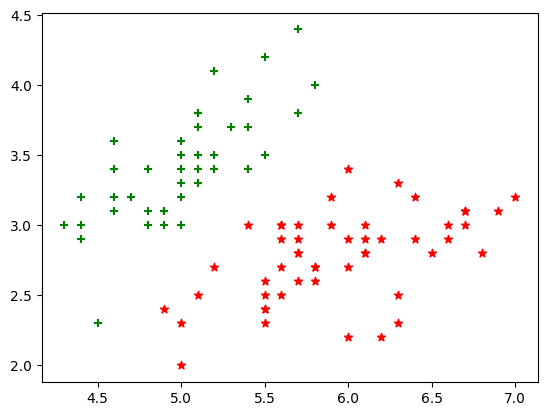

In [8]:
plt.scatter(df0["sepal_length"], df0["sepal_width"], color = "green", marker="+")
plt.scatter(df1["sepal_length"], df1["sepal_width"], color = "red", marker="*")
plt.show()

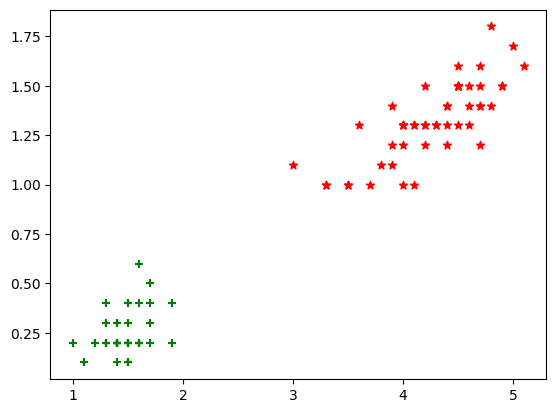

In [9]:
plt.scatter(df0["petal_length"], df0["petal_width"], color = "green", marker="+")
plt.scatter(df1["petal_length"], df1["petal_width"], color = "red", marker="*")
plt.show()

In [10]:
le = LabelEncoder()
data["species"] = le.fit_transform(data["species"])

In [11]:
x = data.drop(["species"],axis="columns")
y = data["species"]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.5, random_state=42)

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)

In [14]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [15]:
knn.score(x_test, y_test)

0.9466666666666667

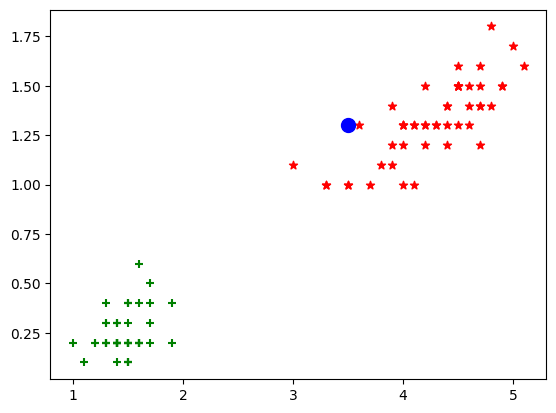

In [16]:
plt.scatter(df0["petal_length"], df0["petal_width"], color = "green", marker="+")
plt.scatter(df1["petal_length"], df1["petal_width"], color = "red", marker="*")
plt.scatter(3.5, 1.3, color="blue", marker="o", s=100, label="custompoint")  # fixed marker and label
plt.show()

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score 

In [18]:
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm 

array([[29,  0,  0],
       [ 0, 23,  0],
       [ 0,  4, 19]])

In [19]:
pre = precision_score(y_test, y_pred, average = "macro")
pre

0.9506172839506174

In [20]:
recall = recall_score(y_test, y_pred, average = "macro")
recall

0.9420289855072465